<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning/blob/master/1-intro/TFvsKeras_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of pure TensorFlow and Keras

In this notebook we are going to present the same problem being solved in two different ways. In both, TensorFlow is going to be used as backend. The main difference is that a high levels API is going to be evaluated and compared wtih TensorFlow implementation. The notebook is divided in three parts:

- Definind the Input Data
- Implementation on TensorFlow
- Implementation on Keras

## Input Data

In [ ]:
import numpy as np

X_train = np.random.random(10)
print(X_train)

[0.00646246 0.31296048 0.93787008 0.61559184 0.46033923 0.36066896
 0.73145211 0.75476398 0.6191128  0.6906117 ]


In [ ]:
w = 5
b = 1
y_train = w*X_train + b


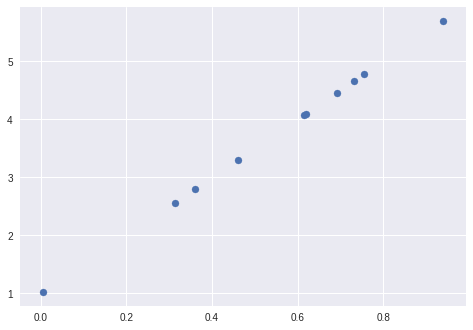

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)

In [ ]:
X_train = np.c_[X_train]
y_train = np.c_[y_train]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

## Implementation in TensorFlow

In [ ]:
import tensorflow as tf

# Parameters
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

# Network Parameters
#n_hidden_1 = 128 # 1st layer number of neurons
#n_hidden_2 = 512 # 2nd layer number of neurons
num_input = 1 # MNIST data input (img shape: 28*28)
num_output = 1 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
y = tf.placeholder("float", [None, num_output])

# Store layers weight & bias
weights = {
    'out': tf.Variable(tf.random_normal([num_input, num_output]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_output]))
}

# Create model
def neural_net(x):
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(x, weights['out']) + biases['out']
    return out_layer

In [ ]:
# Construct model
model = neural_net(X)

loss_op = tf.reduce_mean(tf.square(model-y))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)

In [ ]:
# Evaluate model (with test logits, for dropout to be disabled)
#correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = X_train, y_train#mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        
        #print(sess.run(model, feed_dict={X: X_train}))
        print(sess.run(loss_op, feed_dict={X: batch_x, y: batch_y}))
        
    print("Optimization Finished!")
    
    y_pred = sess.run(model, feed_dict={X: X_train})
    w_pred = sess.run(weights)
    sess.run(biases)

6.5640426
3.8791053
2.397009
1.5765889
1.1201993
0.86413157
0.7183428
0.6333068
0.5817822
0.5487839
0.52606803
0.50909865
0.4953794
0.48353523
0.47280803
0.46277943
0.45321736
0.4439926
0.43503267
0.42629576
0.41775775
0.40940338
0.40122327
0.39321035
0.38535976
0.3776669
0.37012845
0.36274073
0.35550064
0.34840512
0.3414514
0.3346365
0.32795757
0.3214119
0.314997
0.30871
0.3025486
0.29651004
0.29059213
0.28479236
0.27910826
0.27353764
0.2680782
0.26272765
0.257484
0.2523449
0.24730845
0.24237254
0.23753509
0.23279421
0.22814801
0.2235944
0.21913178
0.21475816
0.21047187
0.20627117
0.20215428
0.19811955
0.19416535
0.19029005
0.18649213
0.18277001
0.17912215
0.17554715
0.17204341
0.16860965
0.16524446
0.16194639
0.15871415
0.15554643
0.1524419
0.14939944
0.14641763
0.14349523
0.14063129
0.13782445
0.13507369
0.13237783
0.12973572
0.12714636
0.12460868
0.12212165
0.11968426
0.11729556
0.11495452
0.11266015
0.11041161
0.108207956
0.10604827
0.10393169
0.10185733
0.09982436
0.09783202
0.09

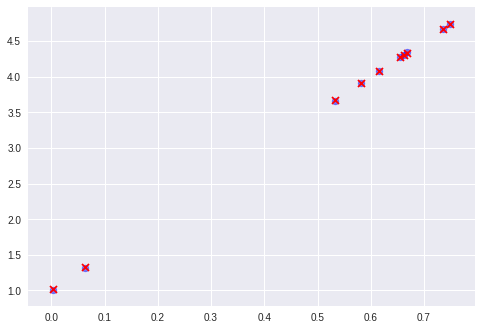

In [ ]:
plt.scatter(X_train, y_train, c='b', alpha=0.5)
plt.scatter(X_train, y_pred, c='r', marker='x')

## Implementation in Keras

In [ ]:
import keras

model = keras.models.Sequential([
  Dense(units=1, input_shape=(1,))
])

sgd = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd,
              loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
10/10 [==============================] - 0s 28ms/step - loss: 0.1629
Epoch 2/10
10/10 [==============================] - 0s 414us/step - loss: 0.1042
Epoch 3/10
10/10 [==============================] - 0s 327us/step - loss: 0.0667
Epoch 4/10
10/10 [==============================] - 0s 404us/step - loss: 0.0427
Epoch 5/10
10/10 [==============================] - 0s 257us/step - loss: 0.0273
Epoch 6/10
10/10 [==============================] - 0s 341us/step - loss: 0.0175
Epoch 7/10
10/10 [==============================] - 0s 245us/step - loss: 0.0112
Epoch 8/10
10/10 [==============================] - 0s 246us/step - loss: 0.0072
Epoch 9/10
10/10 [==============================] - 0s 309us/step - loss: 0.0046
Epoch 10/10
10/10 [==============================] - 0s 311us/step - loss: 0.0029


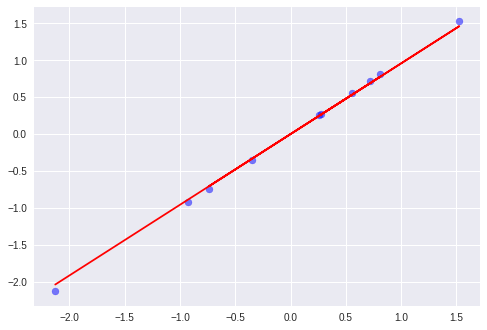

In [ ]:
y_pred = model.predict(X_train)
plt.scatter(X_train, y_train, c='b', alpha=0.5)
plt.plot(X_train, y_pred, c='r')#, marker='x')